#  Most Frequent Imputation (Replace Null values by Mode )

replacing Null Values with the most frequently used data in dataset

But it can change The distibution of Data 

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data set

In [4]:
df = pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


# Checking % of Null values 

In [6]:
df.isnull().mean()*100         # large number of values are missing in FireplaceQu column 

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Mode of GarageQual

In [7]:
df['GarageQual'].mode()    # TA is the most repeated value

0    TA
Name: GarageQual, dtype: object

# Distribution plot 

Text(0.5, 1.0, 'GarageQual')

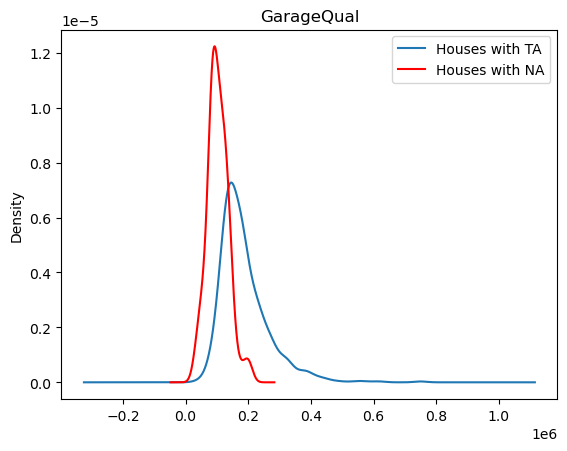

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)   #sales price when GarageQual is TA 
  
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')  #sales price when GarageQual is Null 

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

# Filling Null Values By mode  

In [9]:
df['GarageQual'].fillna('TA',inplace=True)

In [10]:
df.sample(5)   # Null values replaced by TA

,FireplaceQu,GarageQual,SalePrice
893,Gd,TA,165000
915,NaN,TA,75000
2,TA,TA,223500
522,Gd,TA,159000
702,Gd,TA,361919


# Filling Null values By Mode in Sklearn 

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')    # simple inputer of mode 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

D:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [13]:
imputer.statistics_  # values Imputer by GD in FireplaceQu column and TA in GarageQual column 

array(['Gd', 'TA'], dtype=object)

# Filling Null values By "MISSING " in Sklearn

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='constant',fill_value='Missing')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

D:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [15]:
imputer.statistics_   # null values are replaced by missing in both columns 

array(['Missing', 'Missing'], dtype=object)